# Imports

In [78]:
import data_preprocessing as dp
import plotting as p
import numpy as np
import matplotlib.pyplot as plt

# Constants

In [79]:
COORD_SYSTEM = "EPSG:4326"

de_results_path = 'data/output/de.txt'
de_aoi_path = 'data/Germany/germany_rect.shp'

italy_results_path = 'data/output/italy.txt'
italy_aoi_path = 'data/Italy/italy_rect.shp'

pa_results_path = 'data/output/pa.txt'
pa_aoi_path = 'data/Panama/panama_rect.shp'

swiss_results_path = 'data/output/swiss.txt'
swiss_aoi_path = 'data/Switzerland/switzerland_rect.shp'

# Study regions

/Users/annalisefishell/MasterThesis/plotting.py:66: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  latam = latam[latam.geometry.centroid.x.between(-120, -30) & latam.geometry.centroid.y.between(-60, 30)]
/Users/annalisefishell/MasterThesis/plotting.py:101: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe = europe_exp[europe_exp.geometry.centroid.x > -25]
/Users/annalisefishell/MasterThesis/plotting.py:102: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe = europe[europe.geometry.centroid.y > 34]
/Users/annalisefishell/MasterThesis/plotting.py:103: UserWarning: Geo

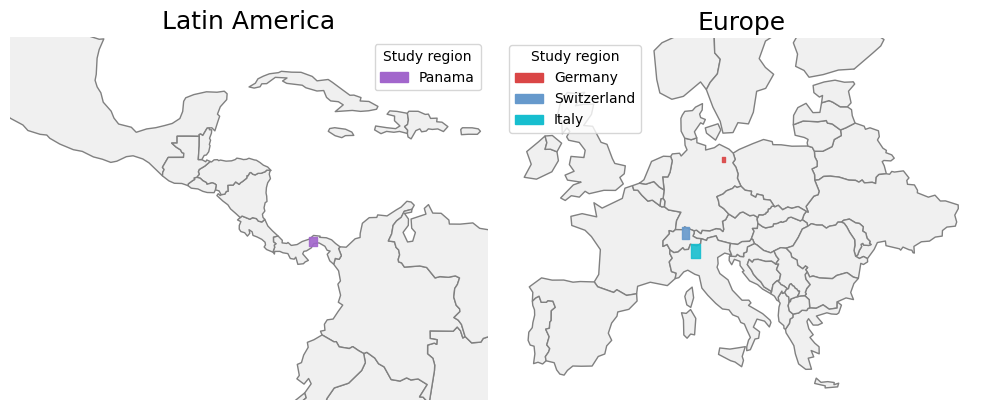

In [80]:
de_aoi = dp.get_aoi_geometry(de_aoi_path, False)
de_aoi = de_aoi.set_crs(COORD_SYSTEM, allow_override=True)

italy_aoi = dp.get_aoi_geometry(italy_aoi_path, False)
italy_aoi = italy_aoi.set_crs(COORD_SYSTEM, allow_override=True)

swiss_aoi = dp.get_aoi_geometry(swiss_aoi_path, False)
swiss_aoi = swiss_aoi.set_crs(COORD_SYSTEM, allow_override=True)

pa_aoi = dp.get_aoi_geometry(pa_aoi_path, False)
pa_aoi = pa_aoi.set_crs(COORD_SYSTEM, allow_override=True)

polygons = [de_aoi[0], swiss_aoi[0], italy_aoi[0], pa_aoi[0]]
p.plot_aois_on_map(polygons)

# Read data

### Germany

In [81]:
de_results = dp.read_eval_file(de_results_path)

In [82]:
# terra, iceye, optical
de_mlr_terra_time, de_mlr_terra_rmse, de_mlr_terra_r2 = dp.get_metrics(de_results, 'MLR (terra)')
de_rf_terra_time, de_rf_terra_rmse, de_rf_terra_r2 = dp.get_metrics(de_results, 'RF (terra)')

de_mlr_iceye_time, de_mlr_iceye_rmse, de_mlr_iceye_r2 = dp.get_metrics(de_results, 'MLR (iceye)')
de_rf_iceye_time, de_rf_iceye_rmse, de_rf_iceye_r2 = dp.get_metrics(de_results, 'RF (iceye)')

de_mlr_optical_time, de_mlr_optical_rmse, de_mlr_optical_r2 = dp.get_metrics(de_results, 'MLR (optical)')
de_rf_optical_time, de_rf_optical_rmse, de_rf_optical_r2 = dp.get_metrics(de_results, 'RF (optical)')


In [83]:
de_mlr_times, de_mlr_rmses, de_mlr_r2s = dp.get_mean_metrics(de_results, 'MLR (all)')
de_rf_times, de_rf_rmses, de_rf_r2s = dp.get_mean_metrics(de_results, 'RF (all)')
de_gbt_times, de_gbt_rmses, de_gbt_r2s = dp.get_mean_metrics(de_results, 'GBT (all)')
de_cnn_times, de_cnn_rmses, de_cnn_r2s = dp.get_mean_metrics(de_results, 'CNN (all)')

### Panama

In [84]:
pa_results = dp.read_eval_file(pa_results_path)

In [85]:
pa_results.keys()

dict_keys(['MLR (optical)', 'RF (optical)', 'MLR (interferogram)', 'RF (interferogram)', 'MLR (iceye)', 'RF (iceye)', 'MLR (all)', 'RF (all)', 'GBT (all)', 'CNN (all)'])

In [86]:
# interferogram, iceye, optical
pa_mlr_insar_time, pa_mlr_insar_rmse, pa_mlr_insar_r2 = dp.get_metrics(pa_results, 'MLR (interferogram)')
pa_rf_insar_time, pa_rf_insar_rmse, pa_rf_insar_r2 = dp.get_metrics(pa_results, 'RF (interferogram)')

pa_mlr_iceye_time, pa_mlr_iceye_rmse, pa_mlr_iceye_r2 = dp.get_metrics(pa_results, 'MLR (iceye)')
pa_rf_iceye_time, pa_rf_iceye_rmse, pa_rf_iceye_r2 = dp.get_metrics(pa_results, 'RF (iceye)')

pa_mlr_optical_time, pa_mlr_optical_rmse, pa_mlr_optical_r2 = dp.get_metrics(pa_results, 'MLR (optical)')
pa_rf_optical_time, pa_rf_optical_rmse, pa_rf_optical_r2 = dp.get_metrics(pa_results, 'RF (optical)')

In [87]:
pa_mlr_times, pa_mlr_rmses, pa_mlr_r2s = dp.get_mean_metrics(pa_results, 'MLR (all)')
pa_rf_times, pa_rf_rmses, pa_rf_r2s = dp.get_mean_metrics(pa_results, 'RF (all)')
pa_gbt_times, pa_gbt_rmses, pa_gbt_r2s = dp.get_mean_metrics(pa_results, 'GBT (all)')
pa_cnn_times, pa_cnn_rmses, pa_cnn_r2s = dp.get_mean_metrics(pa_results, 'CNN (all)')

### Switzerland

In [88]:
swiss_results = dp.read_eval_file(swiss_results_path)

In [89]:
# interferogram, optical
swiss_mlr_insar_time, swiss_mlr_insar_rmse, swiss_mlr_insar_r2 = dp.get_metrics(swiss_results, 'MLR (interferogram)')
swiss_rf_insar_time, swiss_rf_insar_rmse, swiss_rf_insar_r2 = dp.get_metrics(swiss_results, 'RF (interferogram)')

swiss_mlr_optical_time, swiss_mlr_optical_rmse, swiss_mlr_optical_r2 = dp.get_metrics(swiss_results, 'MLR (optical)')
swiss_rf_optical_time, swiss_rf_optical_rmse, swiss_rf_optical_r2 = dp.get_metrics(swiss_results, 'RF (optical)')

In [90]:
swiss_mlr_times, swiss_mlr_rmses, swiss_mlr_r2s = dp.get_mean_metrics(swiss_results, 'MLR (all)')
swiss_rf_times, swiss_rf_rmses, swiss_rf_r2s = dp.get_mean_metrics(swiss_results, 'RF (all)')
swiss_gbt_times, swiss_gbt_rmses, swiss_gbt_r2s = dp.get_mean_metrics(swiss_results, 'GBT (all)')
swiss_cnn_times, swiss_cnn_rmses, swiss_cnn_r2s = dp.get_mean_metrics(swiss_results, 'CNN (all)')

### Italy

In [91]:
italy_results = dp.read_eval_file(italy_results_path)

In [92]:
# interferogram, optical
italy_mlr_insar_time, italy_mlr_insar_rmse, italy_mlr_insar_r2 = dp.get_metrics(italy_results, 'MLR (interferogram)')
italy_rf_insar_time, italy_rf_insar_rmse, italy_rf_insar_r2 = dp.get_metrics(italy_results, 'RF (interferogram)')

italy_mlr_optical_time, italy_mlr_optical_rmse, italy_mlr_optical_r2 = dp.get_metrics(italy_results, 'MLR (optical)')
italy_rf_optical_time, italy_rf_optical_rmse, italy_rf_optical_r2 = dp.get_metrics(italy_results, 'RF (optical)')

In [93]:
italy_mlr_times, italy_mlr_rmses, italy_mlr_r2s = dp.get_mean_metrics(italy_results, 'MLR (all)')
italy_rf_times, italy_rf_rmses, italy_rf_r2s = dp.get_mean_metrics(italy_results, 'RF (all)')
italy_gbt_times, italy_gbt_rmses, italy_gbt_r2s = dp.get_mean_metrics(italy_results, 'GBT (all)')
italy_cnn_times, italy_cnn_rmses, italy_cnn_r2s = dp.get_mean_metrics(italy_results, 'CNN (all)')

# Input data

In [16]:
print('\t Germany')
print('Control \t\t RF')
print('\t   TerraSAR')
print('%f \t\t %f'% (de_mlr_terra_time, de_rf_terra_time))
print('%f \t\t %f'% (de_mlr_terra_rmse, de_rf_terra_rmse))
print('%f \t\t %f'% (de_mlr_terra_r2, de_rf_terra_r2))

print('\t   Iceye')
print('%f \t\t %f'% (de_mlr_iceye_time, de_rf_iceye_time))
print('%f \t\t %f'% (de_mlr_iceye_rmse, de_rf_iceye_rmse))
print('%f \t\t %f'% (de_mlr_iceye_r2, de_rf_iceye_r2))

print('\t   Optical')
print('%f \t\t %f'% (de_mlr_optical_time, de_rf_optical_time))
print('%f \t\t %f'% (de_mlr_optical_rmse, de_rf_optical_rmse))
print('%f \t\t %f'% (de_mlr_optical_r2, de_rf_optical_r2))
print('\n')

print('\t Panama')
print('Control \t\t RF')
print('\t   TerraSAR')
print('%f \t\t %f'% (pa_mlr_insar_time, pa_rf_insar_time))
print('%f \t\t %f'% (pa_mlr_insar_rmse, pa_rf_insar_rmse))
print('%f \t\t %f'% (pa_mlr_insar_r2, pa_rf_insar_r2))

print('\t   Iceye')
print('%f \t\t %f'% (pa_mlr_iceye_time, pa_rf_iceye_time))
print('%f \t\t %f'% (pa_mlr_iceye_rmse, pa_rf_iceye_rmse))
print('%f \t\t %f'% (pa_mlr_iceye_r2, pa_rf_iceye_r2))

print('\t   Optical')
print('%f \t\t %f'% (pa_mlr_optical_time, pa_rf_optical_time))
print('%f \t\t %f'% (pa_mlr_optical_rmse, pa_rf_optical_rmse))
print('%f \t\t %f'% (pa_mlr_optical_r2, pa_rf_optical_r2))
print('\n')

print('\t Switzerland')
print('Control \t\t RF')
print('\t   InSAR')
print('%f \t\t %f'% (swiss_mlr_insar_time, swiss_rf_insar_time))
print('%f \t\t %f'% (swiss_mlr_insar_rmse, swiss_rf_insar_rmse))
print('%f \t\t %f'% (swiss_mlr_insar_r2, swiss_rf_insar_r2))

print('\t   Optical')
print('%f \t\t %f'% (swiss_mlr_optical_time, swiss_rf_optical_time))
print('%f \t\t %f'% (swiss_mlr_optical_rmse, swiss_rf_optical_rmse))
print('%f \t\t %f'% (swiss_mlr_optical_r2, swiss_rf_optical_r2))
print('\n')

print('\t Italy')
print('Control \t\t RF')
print('\t   InSAR')
print('%f \t\t %f'% (italy_mlr_insar_time, italy_rf_insar_time))
print('%f \t\t %f'% (italy_mlr_insar_rmse, italy_rf_insar_rmse))
print('%f \t\t %f'% (italy_mlr_insar_r2, italy_rf_insar_r2))

print('\t   Optical')
print('%f \t\t %f'% (italy_mlr_optical_time, italy_rf_optical_time))
print('%f \t\t %f'% (italy_mlr_optical_rmse, italy_rf_optical_rmse))
print('%f \t\t %f'% (italy_mlr_optical_r2, italy_rf_optical_r2))

	 Germany
Control 		 RF
	   TerraSAR
0.055845 		 8.926882
66.257311 		 64.627202
0.059561 		 0.105266
	   Iceye
0.048579 		 50.444830
67.553780 		 63.821414
0.022397 		 0.127438
	   Optical
0.623674 		 48.976939
57.386046 		 28.587617
0.294534 		 0.824927


	 Panama
Control 		 RF
	   TerraSAR
0.080177 		 65.842655
116.838951 		 105.606471
0.000327 		 0.183297
	   Iceye
0.103706 		 129.471627
105.652809 		 90.533875
0.182581 		 0.399787
	   Optical
2.572223 		 219.166708
93.625103 		 69.347386
0.358100 		 0.647837


	 Switzerland
Control 		 RF
	   InSAR
0.608296 		 212.178706
97.204384 		 80.104627
0.010966 		 0.328331
	   Optical
2.100440 		 343.538367
84.266762 		 49.284505
0.256720 		 0.745750


	 Italy
Control 		 RF
	   InSAR
0.176887 		 155.718449
80.538231 		 69.148527
0.014023 		 0.273178
	   Optical
4.781503 		 315.615696
76.541362 		 54.397949
0.109457 		 0.550192


In [17]:
de_iceye_perc_r2 = de_rf_iceye_r2/de_rf_r2s[2] * 100
de_optical_perc_r2 = de_rf_optical_r2/de_rf_r2s[2] * 100
de_terra_perc_r2 = de_rf_terra_r2/de_rf_r2s[2] * 100

de_iceye_perc_rmse = de_rf_iceye_rmse/de_rf_rmses[2] * 100
de_optical_perc_rmse = de_rf_optical_rmse/de_rf_rmses[2] * 100
de_terra_perc_rmse = de_rf_terra_rmse/de_rf_rmses[2] * 100

In [18]:
pa_iceye_perc_r2 = pa_rf_iceye_r2/pa_rf_r2s[2] * 100
pa_optical_perc_r2 = pa_rf_optical_r2/pa_rf_r2s[2] * 100
pa_insar_perc_r2 = pa_rf_insar_r2/pa_rf_r2s[2] * 100

pa_iceye_perc_rmse = pa_rf_iceye_rmse/pa_rf_rmses[2] * 100
pa_optical_perc_rmse = pa_rf_optical_rmse/pa_rf_rmses[2] * 100
pa_insar_perc_rmse = pa_rf_insar_rmse/pa_rf_rmses[2] * 100

In [19]:
swiss_insar_perc_r2 = swiss_rf_insar_r2/swiss_rf_r2s[2] * 100
swiss_optical_perc_r2 = swiss_rf_optical_r2/swiss_rf_r2s[2] * 100

swiss_insar_perc_rmse = swiss_rf_insar_rmse/swiss_rf_rmses[2] * 100
swiss_optical_perc_rmse = swiss_rf_optical_rmse/swiss_rf_rmses[2] * 100

In [20]:
italy_insar_perc_r2 = italy_rf_insar_r2/italy_rf_r2s[2] * 100
italy_optical_perc_r2 = italy_rf_optical_r2/italy_rf_r2s[2] * 100

italy_insar_perc_rmse = italy_rf_insar_rmse/italy_rf_rmses[2] * 100
italy_optical_perc_rmse = italy_rf_optical_rmse/italy_rf_rmses[2] * 100

/Users/annalisefishell/MasterThesis/plotting.py:255: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.8])


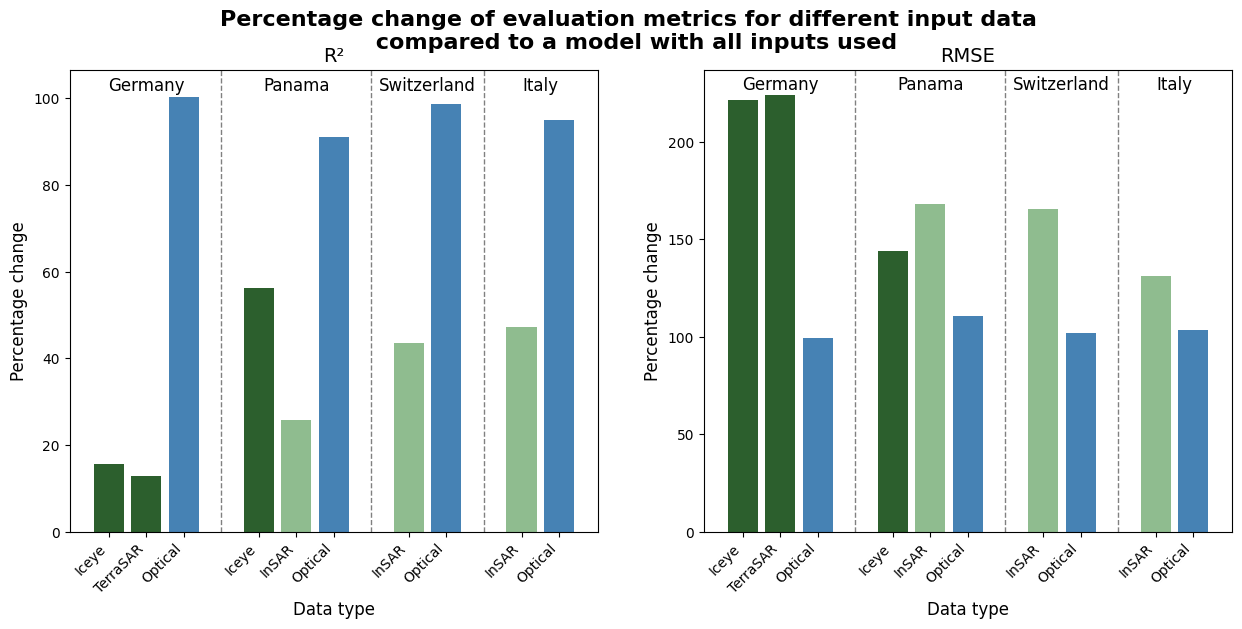

In [ ]:
## make figure based on time, rmse and r2? (change from control?)
r2_values = [de_iceye_perc_r2, de_terra_perc_r2, de_optical_perc_r2, 
          pa_iceye_perc_r2, pa_insar_perc_r2, pa_optical_perc_r2, 
          swiss_insar_perc_r2, swiss_optical_perc_r2, 
          italy_insar_perc_r2, italy_optical_perc_r2
]

rmse_values = [de_iceye_perc_rmse, de_terra_perc_rmse, de_optical_perc_rmse, 
          pa_iceye_perc_rmse, pa_insar_perc_rmse, pa_optical_perc_rmse, 
          swiss_insar_perc_rmse, swiss_optical_perc_rmse, 
          italy_insar_perc_rmse, italy_optical_perc_rmse
]

labels = [
    'Iceye', 'TerraSAR', 'Optical',
    'Iceye', 'InSAR', 'Optical',
    'InSAR', 'Optical',
    'InSAR', 'Optical'
]

x_positions = [
    0, 1, 2,      # Group 1
    4, 5, 6,      # Group 2
    8, 9,         # Group 3
    11, 12        # Group 4
]

gap_centers = [
    (2 + 4) / 2,
    (6 + 8) / 2, 
    (9 + 11) / 2
]

p.plot_input_diff(r2_values, rmse_values, labels, x_positions, gap_centers)

# Locations

Use plots of the regions made in the modeling part - take just an average run and point out the main differences - add any other evaluation

# ML methods

### RF and GBT

/var/folders/78/fm81hr5x4mv371g5d2196vfr0000gn/T/ipykernel_25704/2373550951.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


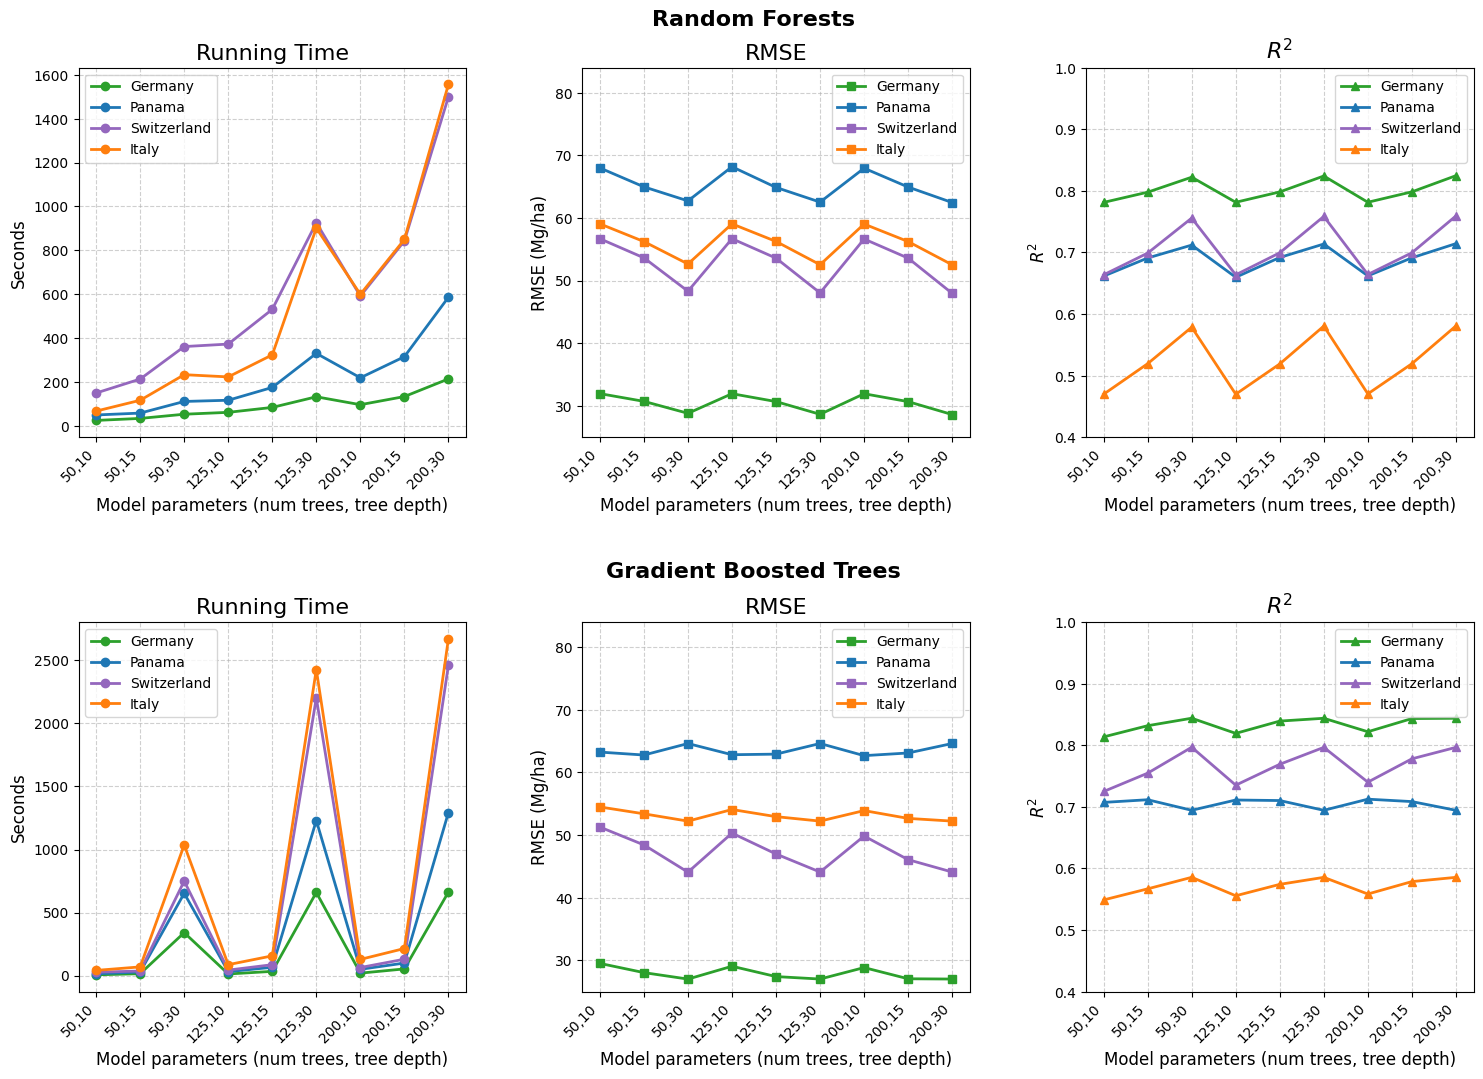

In [18]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12), gridspec_kw={'hspace': 0.5})
plt.subplots_adjust(wspace=0.3)

p.plot_all_mean_metrics(de_rf_times, de_rf_rmses, de_rf_r2s, axs[0,0], axs[0,1], axs[0,2], 0)
p.plot_all_mean_metrics(pa_rf_times, pa_rf_rmses, pa_rf_r2s, axs[0,0], axs[0,1], axs[0,2], 1)
p.plot_all_mean_metrics(swiss_rf_times, swiss_rf_rmses, swiss_rf_r2s, axs[0,0], axs[0,1], axs[0,2], 2)
p.plot_all_mean_metrics(italy_rf_times, italy_rf_rmses, italy_rf_r2s, axs[0,0], axs[0,1], axs[0,2], 3)

p.plot_all_mean_metrics(de_gbt_times, de_gbt_rmses, de_gbt_r2s, axs[1,0], axs[1,1], axs[1,2], 0)
p.plot_all_mean_metrics(pa_gbt_times, pa_gbt_rmses, pa_gbt_r2s, axs[1,0], axs[1,1], axs[1,2], 1)
p.plot_all_mean_metrics(swiss_gbt_times, swiss_gbt_rmses, swiss_gbt_r2s, axs[1,0], axs[1,1], axs[1,2], 2)
p.plot_all_mean_metrics(italy_gbt_times, italy_gbt_rmses, italy_gbt_r2s, axs[1,0], axs[1,1], axs[1,2], 3)

fig.text(0.5, 0.92, 'Random Forests', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.5, 0.46, 'Gradient Boosted Trees', ha='center', va='center', fontsize=16, fontweight='bold')

plt.tight_layout() 
plt.show()

### CNNs

In [113]:
times_cnn

[np.float64(277.93670628070834),
 np.float64(1903.8860822439194),
 np.float64(5833.319730043411),
 np.float64(1086.1815958023071),
 np.float64(3401.1074652671814),
 np.float64(9415.401186943054),
 np.float64(5563.757965803146),
 np.float64(6417.467584848404)]

In [115]:
rmse_cnn

[np.float64(46.748032633463545),
 np.float64(70.61890805562338),
 np.float64(83.38854217529297),
 np.float64(87.06281280517578),
 np.float64(83.68228149414062),
 np.float64(81.0304946899414),
 np.float64(77.33613586425781),
 np.float64(77.1485824584961)]

In [116]:
r2_cnn

[np.float64(0.5378849565982818),
 np.float64(0.2275321434814638),
 np.float64(0.49244433641433716),
 np.float64(0.44837263226509094),
 np.float64(0.26978886127471924),
 np.float64(0.31279581785202026),
 np.float64(0.09112913906574249),
 np.float64(0.09502648562192917)]

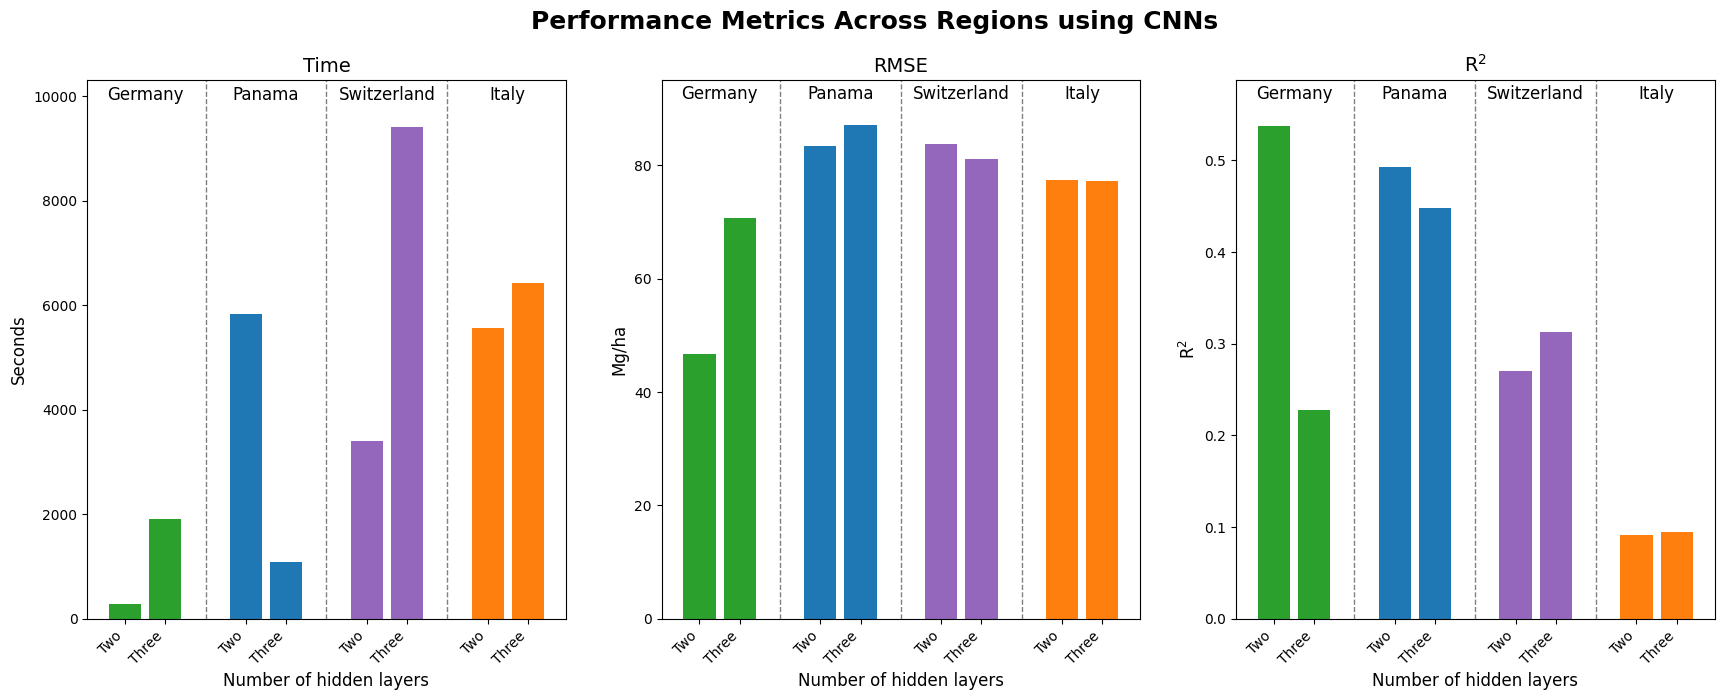

In [135]:
times_cnn = list(np.array([de_cnn_times, pa_cnn_times, swiss_cnn_times, italy_cnn_times]).flatten())
rmse_cnn = list(np.array([de_cnn_rmses, pa_cnn_rmses, swiss_cnn_rmses, italy_cnn_rmses]).flatten())
r2_cnn = list(np.array([de_cnn_r2s, pa_cnn_r2s, swiss_cnn_r2s, italy_cnn_r2s]).flatten())
value_sets = [times_cnn, rmse_cnn, r2_cnn]

labels = [
    'Two', 'Three',
    'Two', 'Three',
    'Two', 'Three',
    'Two', 'Three',
]

x_positions = [
    0, 1,      # Germany
    3, 4,       # Panama
    6, 7,         # Switzerland
    9, 10        # Italy
]

group_centers = [
    np.mean([0, 1]),     
    np.mean([3, 4]),     
    np.mean([6, 7]),        
    np.mean([9, 10])       
]

group_labels = ['Germany', 'Panama', 'Switzerland', 'Italy']
titles = ['Time', 'RMSE', 'R$^2$']
ylabels = ['Seconds', 'Mg/ha', 'R$^2$']
colors = ["#2CA02C","#2CA02C", "#1F77B4","#1F77B4", "#9467BD","#9467BD", "#FF7F0E","#FF7F0E"]
offsets = [900, 8, 0.05]

fig, axs = plt.subplots(1, 3, figsize=(21, 7))

for i, ax in enumerate(axs):
    values = value_sets[i]
    
    # Plot bars
    bars = ax.bar(x_positions, values, color=colors)
    
    # Set x-ticks
    ax.set_xticks(x_positions)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    # ax.set_yticklabels(fontsize=10)
    
    # Set title and labels
    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel(ylabels[i], fontsize=12)
    ax.set_xlabel('Number of hidden layers',fontsize=12)

    # Group labels above bars
    for center, label in zip(group_centers, group_labels):
        ax.text(center, max(values) + offsets[i]/2, label, ha='center', va='bottom', fontsize=12)
    
    # Dashed lines between groups
    gap_centers = [
        (1 + 3) / 2,
        (4 + 6) / 2,
        (7 + 9) / 2
    ]
    
    for edge in gap_centers:
        ax.axvline(x=edge, color='gray', linestyle='--', linewidth=1)
    
    ax.set_ylim(0, max(values) + offsets[i])

# Add a global suptitle
plt.suptitle('Performance Metrics Across Regions using CNNs', fontsize=18, fontweight='bold')

# plt.tight_layout(rect=[0, 0, 1, 0.92])  # Leave space for suptitle
plt.show()